<center><h2 style= "margin: 1em 0 0.5em 0;
	color: #343434;
	font-weight: normal;
	font-family: 'Ultra', sans-serif;   
	font-size: 36px;
	line-height: 42px;
	text-transform: uppercase;
	text-shadow: 0 2px white, 0 3px #777;">Directing Customers to Subscription Through App Behavior Analysis</h2></center>

## Problem Statement

*In todays market, many companies has mobile presence. often these companies provide free products/services in their mobile apps in an attempt to transition their customers to a paid membership. Some examples of paid produtrs, which originate from the free ones are YouTube Red, Pandora Premium, Audible Subscription, and you Need a Budget. Since marketing efforts are never free, these companies need to know exactly who to target with offers and promotions.*

- **Market:** The target audience is customers who use a company's product. In this case study, this refers to users who installed(and used) the cpmpany's free mobile app.

- **Product:** The paid membership often provide enhanced versions of the free products already given for free, alongside nre features. For example, YouTube Red allows you to leave the app while still listening to a video.

- **Goal:** The objective of this model is to predict which users will not subscribe to the paid membership, so that greater marketing efforts can go into trying to "convert" them to paid users.


## Importing Libraries

In [34]:
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
pd.set_option('display.max_columns', 100) # Show all columns when looking at dataframe

In [2]:
import warnings
warnings.filterwarnings('ignore') # remove warnings from Jupyter Notebook

## Importing the Dataset

In [3]:
dataset = pd.read_csv('appdata10.csv')

## Exploratory Data Analysis

In [4]:
dataset.head(10) # Viewing the Data

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
5,56480,2013-04-03 09:58:15.752,2,09:00:00,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0
6,144649,2012-12-25 02:33:18.461,1,02:00:00,35,"product_review,product_review2,ScanPreview",3,0,0,0,NaN,0
7,249366,2012-12-11 03:07:49.875,1,03:00:00,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,NaN,0
8,372004,2013-03-20 14:22:01.569,2,14:00:00,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,1,2013-04-27 22:24:54.542,0
9,338013,2013-04-26 18:22:16.013,4,18:00:00,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,2013-04-26 18:31:58.923,0


In [5]:
dataset.describe() # Descriptive Statistics of Numerical Variables

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# First set of Feature cleaning
dataset["hour"] = dataset.hour.str.slice(1, 3).astype(int)

In [7]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [8]:
# plotting
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date',
                                           'first_open', 'enrolled'])

In [9]:
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


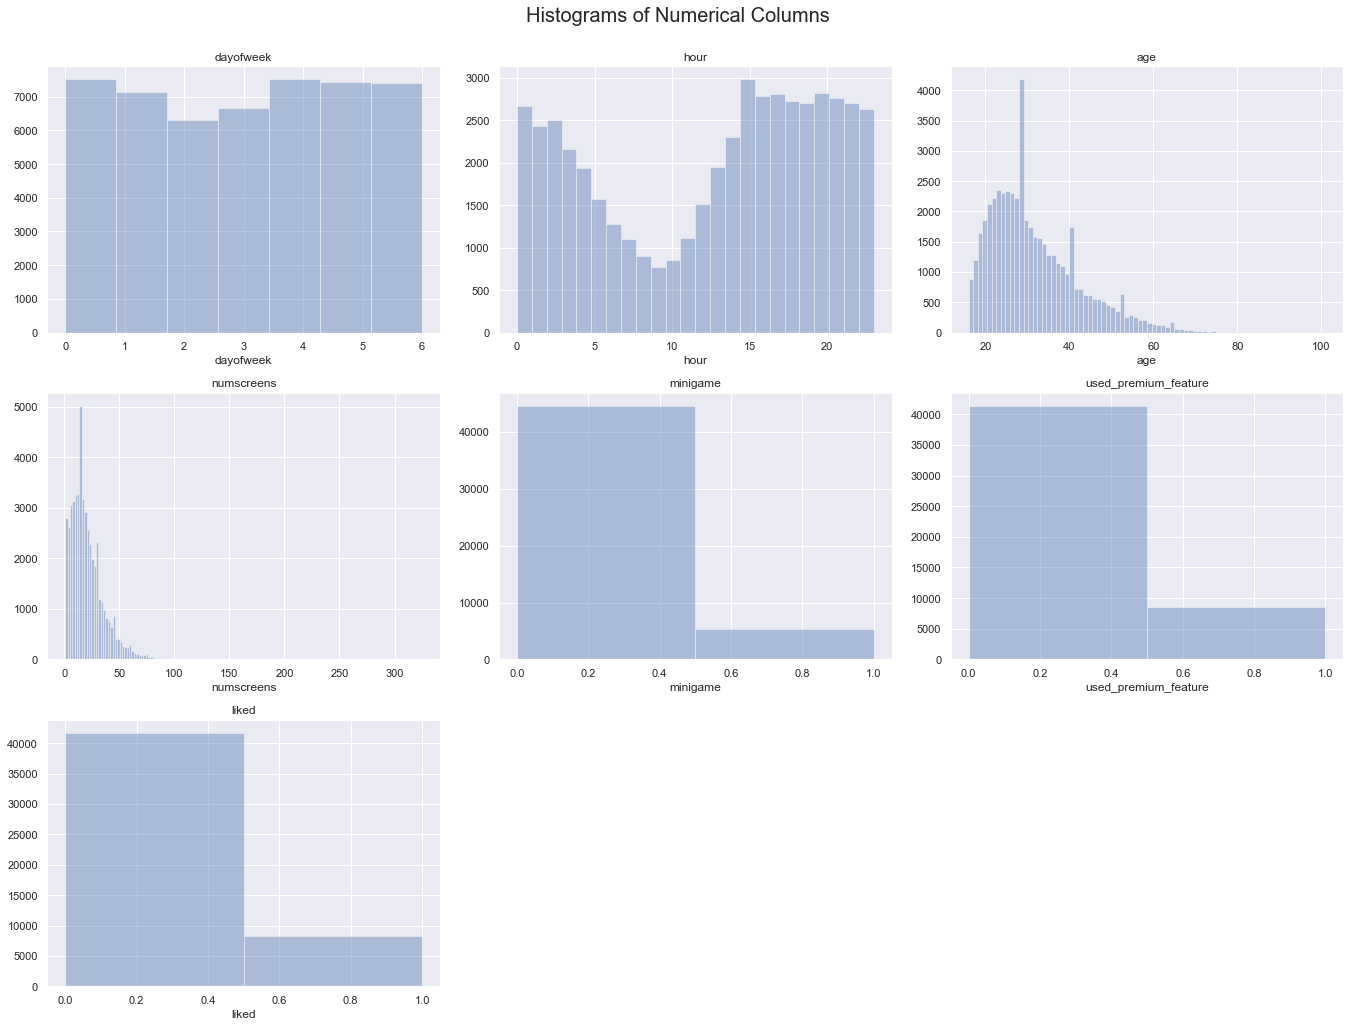

In [10]:
# Histograms
sns.set()
plt.figure(figsize=(19,15))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(3, 3, i)
    f = plt.gca()
#    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])

    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    sns.distplot(dataset2.iloc[:, i - 1], bins=vals, kde= False)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

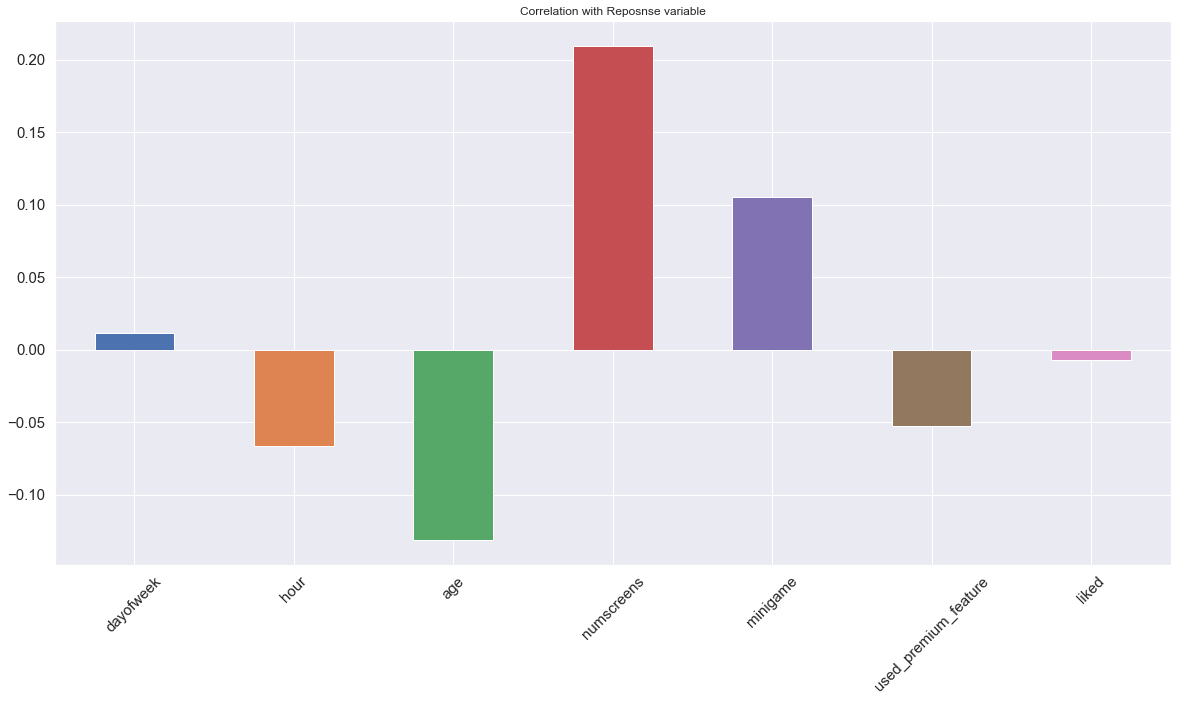

In [11]:
# Correlation with Response Variable
sns.set()
dataset2.corrwith(dataset.enrolled).plot.bar(figsize=(20,10),
                  title = 'Correlation with Reposnse variable',
                  fontsize = 15, rot = 45,
                  grid = True)

In [12]:
## Correlation Matrix
sns.set(style="white", font_scale=2)

In [13]:
# Compute the correlation matrix
corr = dataset2.corr()
corr

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
dayofweek,1.000000,0.013249,-0.012326,0.007925,-0.008631,0.001439,-0.005737
hour,0.013249,1.000000,0.018859,-0.076756,-0.009120,0.022553,-0.001725
age,-0.012326,0.018859,1.000000,-0.128739,0.019745,0.004301,-0.002593
numscreens,0.007925,-0.076756,-0.128739,1.000000,0.041154,0.061972,-0.007349
minigame,-0.008631,-0.009120,0.019745,0.041154,1.000000,0.108780,-0.012250
used_premium_feature,0.001439,0.022553,0.004301,0.061972,0.108780,1.000000,0.001690
liked,-0.005737,-0.001725,-0.002593,-0.007349,-0.012250,0.001690,1.000000


In [14]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

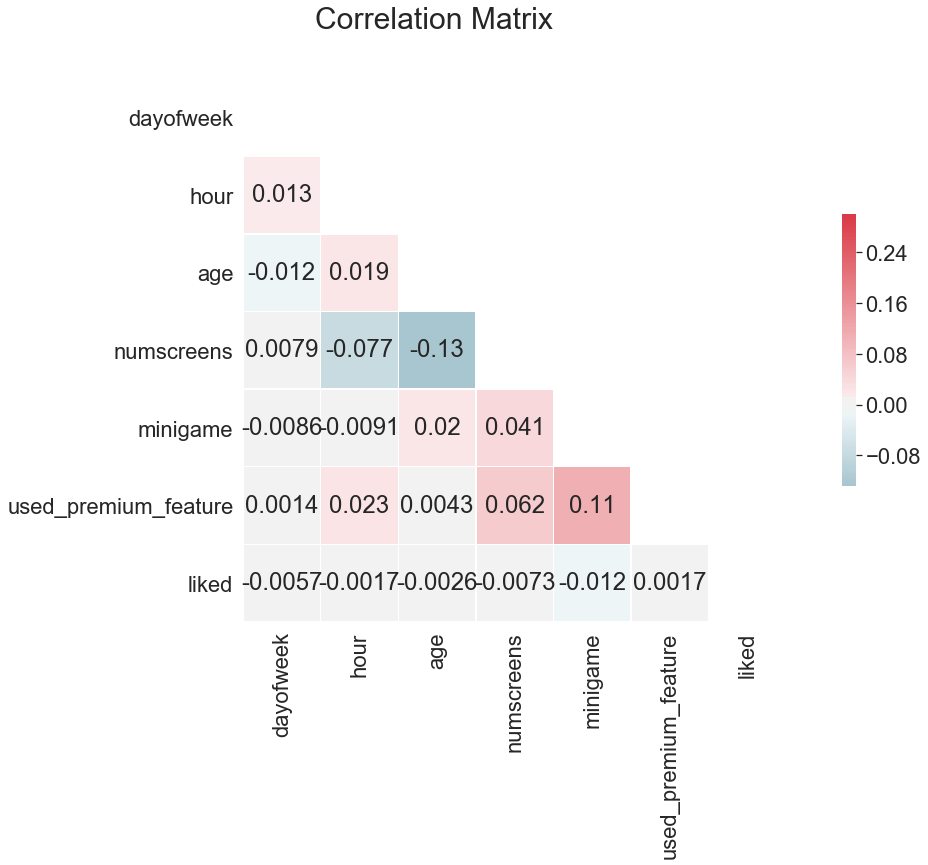

In [15]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))
f.suptitle("Correlation Matrix", fontsize = 30)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,annot=True, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [16]:
# Feature Engineering
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [17]:
# converting into DataTime
dataset["first_open"] = [parser.parse(row_date) for row_date in dataset["first_open"]]
dataset["enrolled_date"] = [parser.parse(row_date) if isinstance(row_date, str) else row_date for row_date in dataset["enrolled_date"]]

In [18]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

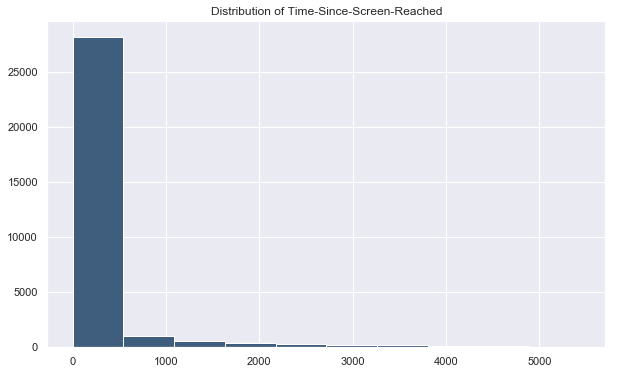

In [19]:
# Selecting Time For Response
sns.set()
plt.figure(figsize=(10,6))
# Time elapsed between first_open and Enrolling in premiun Date
dataset["difference"] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')
response_hist = plt.hist(dataset["difference"].dropna(), color='#3F5D7D')
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

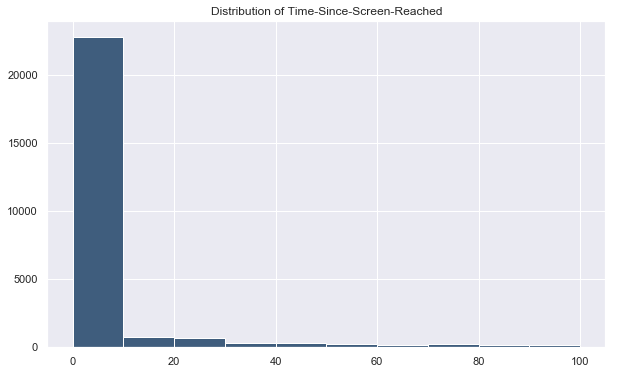

In [20]:
# plot the histogram for first 100 hours
sns.set()
plt.figure(figsize=(10,6))
plt.hist(dataset["difference"].dropna(), color='#3F5D7D', range = [0, 100])
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

In [21]:
# The cuttoff for the dataset will be 50 hours or to be more specific 48 hrs(i.e 2 days)
dataset.loc[dataset.difference > 48, 'enrolled'] = 0
dataset = dataset.drop(columns=['enrolled_date', 'difference', 'first_open'])

In [22]:
# Formatting the screen_list Field

In [23]:
# Load Top Screens
top_screens = pd.read_csv('top_screens.csv').top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [24]:
# Mapping Screens to Fields
dataset["screen_list"] = dataset.screen_list.astype(str) + ','

for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+",", "")

dataset['Other'] = dataset.screen_list.str.count(",")
dataset = dataset.drop(columns=['screen_list'])

In [25]:
# Funnels
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
dataset["SavingCount"] = dataset[savings_screens].sum(axis=1)
dataset = dataset.drop(columns=savings_screens)

In [26]:
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

In [27]:
cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

In [28]:
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)

In [30]:
#### Saving Results ####
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,2,0,1


In [31]:
dataset.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,0.293660,0.524600,0.319540,0.473480,0.158040,0.423160,0.364860,0.340700,0.200760,0.084000,0.048980,0.076540,0.073720,0.051520,0.053860,0.045080,0.030920,0.041420,0.047560,0.0,0.0455,0.041060,0.024420,0.026220,0.023580,0.031760,0.022460,0.029800,0.021160,0.096560,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,0.455443,0.499399,0.466303,0.499301,0.364782,0.494065,0.481396,0.473949,0.400573,0.277391,0.215828,0.265863,0.261317,0.221058,0.225743,0.207482,0.173103,0.199262,0.212836,0.0,0.2084,0.198431,0.154351,0.159791,0.151738,0.175362,0.148176,0.170037,0.143919,0.295361,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23

In [32]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other',
       'SavingCount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [35]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,2,0,1


In [36]:
dataset.shape

(50000, 50)

In [37]:
# Copy of Dataset as df
df= dataset

## Data Pre-Processing

In [38]:
# Splitting Independent and Dependent Variables
X = df.drop(columns="enrolled")
y = df["enrolled"]

In [39]:
    X.shape, y.shape

((50000, 49), (50000,))

In [41]:
# Splitting the data into test and validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5, stratify= df.enrolled)

In [42]:
# Removing Identifiers i.e user ID
train_identity = X_train['user']
X_train = X_train.drop(columns = ['user'])
test_identity = X_test['user']
X_test = X_test.drop(columns = ['user'])

In [43]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

In [44]:
# Assigning the column names of scaled data to the original data columns
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

In [45]:
# Assigning the row indices of scaled data to the original data columns
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [46]:
X_train = X_train2
X_test = X_test2

In [47]:
X_train.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
24031,-0.998390,1.404508,-0.438777,-0.068452,-0.34805,-0.457053,-0.445173,-1.038022,1.552437,-1.045379,-0.683080,-0.947857,-0.433184,-0.854330,-0.757667,-0.715782,-0.502069,-0.303906,-0.22766,-0.28705,-0.284285,-0.233611,-0.240203,-0.218081,-0.180124,-0.208275,-0.224114,0.0,-0.218269,-0.206373,-0.158478,6.023177,-0.157814,-0.180493,-0.152834,-0.175334,-0.147259,-0.326766,-0.120019,-0.115101,-0.117530,-0.09341,-0.085754,-0.328346,-0.260312,0.879951,-0.288893,3.258868
2300,-1.490444,-0.076487,1.135560,-0.513473,-0.34805,2.187930,-0.445173,-1.038022,1.552437,-1.045379,1.463957,-0.947857,-0.433184,-0.854330,-0.757667,-0.715782,-0.502069,3.290489,-0.22766,-0.28705,-0.284285,-0.233611,-0.240203,-0.218081,-0.180124,-0.208275,-0.224114,0.0,-0.218269,-0.206373,-0.158478,-0.166025,-0.157814,-0.180493,-0.152834,-0.175334,-0.147259,-0.326766,-0.120019,-0.115101,-0.117530,-0.09341,-0.085754,-1.147418,-0.260312,-0.761442,-0.288893,-1.162634
2480,-1.490444,0.731329,-0.531385,2.665246,-0.34805,2.187930,-0.445173,0.963370,1.552437,-1.045379,1.463957,-0.947857,-0.433184,1.170508,-0.757667,-0.715782,-0.502069,3.290489,-0.22766,-0.28705,3.517592,4.280616,-0.240203,-0.218081,-0.180124,-0.208275,-0.224114,0.0,-0.218269,-0.206373,-0.158478,-0.166025,-0.157814,-0.180493,-0.152834,-0.175334,-0.147259,3.060291,-0.120019,-0.115101,8.508495,-0.09341,-0.085754,0.490727,-0.260312,1.700647,2.977283,0.311200
14812,1.461880,1.135236,-0.346169,-0.132027,-0.34805,-0.457053,-0.445173,0.963370,1.552437,0.956591,-0.683080,1.055011,-0.433184,-0.854330,-0.757667,-0.715782,-0.502069,-0.303906,-0.22766,-0.28705,-0.284285,-0.233611,-0.240203,-0.218081,-0.180124,-0.208275,-0.224114,0.0,-0.218269,-0.206373,-0.158478,-0.166025,-0.157814,-0.180493,-0.152834,-0.175334,-0.147259,-0.326766,-0.120019,-0.115101,-0.117530,-0.09341,-0.085754,-0.055322,-0.260312,1.700647,-0.288893,0.311200
12089,-0.998390,-1.288210,1.783816,-0.449898,-0.34805,-0.457053,-0.445173,0.963370,-0.644149,0.956591,-0.683080,1.055011,-0.433184,1.170508,-0.757667,-0.715782,1.991756,-0.303906,-0.22766,-0.28705,-0.284285,-0.233611,-0.240203,-0.218081,-0.180124,-0.208275,-0.224114,0.0,-0.218269,-0.206373,-0.158478,-0.166025,-0.157814,-0.180493,-0.152834,-0.175334,-0.147259,-0.326766,-0.120019,-0.115101,-0.117530,-0.09341,-0.085754,0.217703,-0.260312,-0.761442,-0.288893,0.311200


In [48]:
X_test.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
12419,-0.014282,-1.288210,1.505992,-1.276365,2.873147,2.187930,-0.445173,-1.038022,-0.644149,-1.045379,-0.683080,-0.947857,-0.433184,-0.854330,-0.757667,-0.715782,-0.502069,-0.303906,-0.22766,-0.28705,-0.284285,-0.233611,-0.240203,-0.218081,-0.180124,-0.208275,-0.224114,0.0,-0.218269,-0.206373,-0.158478,-0.166025,-0.157814,-0.180493,-0.152834,-0.175334,-0.147259,-0.326766,-0.120019,-0.115101,-0.11753,-0.09341,-0.085754,-1.420442,-0.260312,-0.761442,-0.288893,-1.162634
40275,1.461880,-0.345758,0.302087,-0.386324,-0.348050,-0.457053,-0.445173,0.963370,-0.644149,0.956591,1.463957,1.055011,-0.433184,1.170508,-0.757667,-0.715782,-0.502069,-0.303906,-0.22766,-0.28705,-0.284285,-0.233611,-0.240203,-0.218081,-0.180124,-0.208275,-0.224114,0.0,-0.218269,-0.206373,-0.158478,-0.166025,-0.157814,-0.180493,-0.152834,-0.175334,-0.147259,-0.326766,-0.120019,-0.115101,-0.11753,-0.09341,-0.085754,0.490727,-0.260312,-0.761442,-0.288893,-1.162634
30676,-0.506336,1.000600,-0.716601,1.266610,-0.348050,-0.457053,-0.445173,0.963370,-0.644149,0.956591,-0.683080,1.055011,2.308487,1.170508,1.319841,1.397073,1.991756,3.290489,-0.22766,-0.28705,3.517592,-0.233611,-0.240203,-0.218081,-0.180124,-0.208275,-0.224114,0.0,-0.218269,-0.206373,-0.158478,-0.166025,-0.157814,-0.180493,-0.152834,5.703413,-0.147259,-0.326766,-0.120019,-0.115101,-0.11753,-0.09341,-0.085754,2.401896,-0.260312,-0.761442,-0.288893,-1.162634
32671,-1.490444,-1.153574,0.579912,-0.386324,-0.348050,-0.457053,-0.445173,-1.038022,-0.644149,0.956591,-0.683080,-0.947857,-0.433184,-0.854330,-0.757667,-0.715782,1.991756,-0.303906,-0.22766,-0.28705,-0.284285,-0.233611,-0.240203,-0.218081,-0.180124,-0.208275,-0.224114,0.0,-0.218269,-0.206373,-0.158478,-0.166025,-0.157814,-0.180493,-0.152834,-0.175334,-0.147259,-0.326766,-0.120019,-0.115101,-0.11753,-0.09341,-0.085754,-0.055322,-0.260312,1.700647,-0.288893,0.311200
1218,-0.506336,-1.288210,2.154249,-0.640622,-0.348050,-0.457053,-0.445173,-1.038022,-0.644149,-1.045379,-0.683080,-0.947857,-0.433184,-0.854330,-0.757667,-0.715782,-0.502069,-0.303906,-0.22766,-0.28705,-0.284285,-0.233611,-0.240203,4.585459,-0.180124,4.801345,-0.224114,0.0,-0.218269,-0.206373,-0.158478,-0.166025,-0.157814,-0.180493,-0.152834,-0.175334,-0.147259,-0.326766,-0.120019,-0.115101,-0.11753,-0.09341,-0.085754,-0.874394,3.294164,0.059254,-0.288893,-1.162634


## Model Building

In [49]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
# Predicting Test Set
y_pred = classifier.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)

Test Data Accuracy: 0.7648


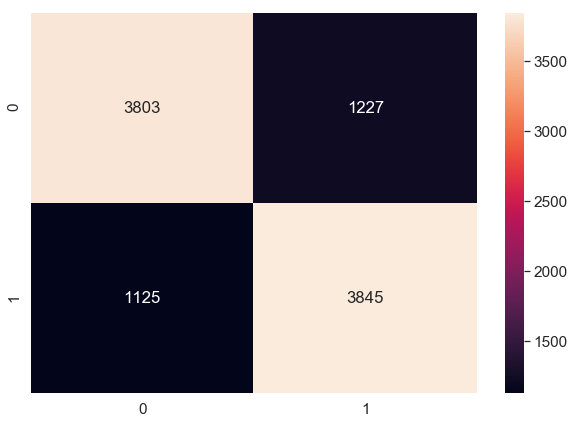

In [53]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [54]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.77      0.76      0.76      5030
          1       0.76      0.77      0.77      4970

avg / total       0.76      0.76      0.76     10000



In [55]:
# K-Fold cross validation with 10 folds
from sklearn.model_selection import cross_val_score
scores= cross_val_score(classifier, X_train, y_train, cv=10)

In [56]:
def display_scores(scores):
  print("Scores: ", scores)
  print("Mean: ", scores.mean())
  print("Standard deviation: ", scores.std())

In [57]:
display_scores(scores)

Scores:  [0.7605  0.772   0.77575 0.77775 0.777   0.7615  0.75975 0.76425 0.77225
 0.7695 ]
Mean:  0.769025
Standard deviation:  0.006652490135280195


In [58]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(dataset.drop(columns = 'user').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,dayofweek,0.027575
1,hour,-0.008175
2,age,-0.144825
3,numscreens,-0.114064
4,minigame,-0.025145
5,used_premium_feature,-0.066492
6,enrolled,0.006180
7,liked,-0.022652
8,location,-0.064469
9,Institutions,0.643939


## Model Tuning

In [59]:
## Grid Search (Round 1)
from sklearn.model_selection import GridSearchCV
# Select Regularization Method
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# Combine Parameters
parameters = dict(C=C, penalty=penalty)
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

In [60]:
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)

In [61]:
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

Took 144.01 seconds


(0.76925, {'C': 0.01, 'penalty': 'l2'})

In [62]:
# Select Regularization Method
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = [0.1, 0.5, 0.9, 1, 2, 5]
# Combine Parameters
parameters = dict(C=C, penalty=penalty)
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

In [63]:
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)

In [65]:
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

Took 301.87 seconds


(0.769075, {'C': 0.1, 'penalty': 'l1'})

In [74]:
# Fitting the finalised tuned model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C = 0.01, random_state = 0, penalty = 'l2')
classifier.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
y_pred = classifier.predict(X_test)

Test Data Accuracy: 0.7643


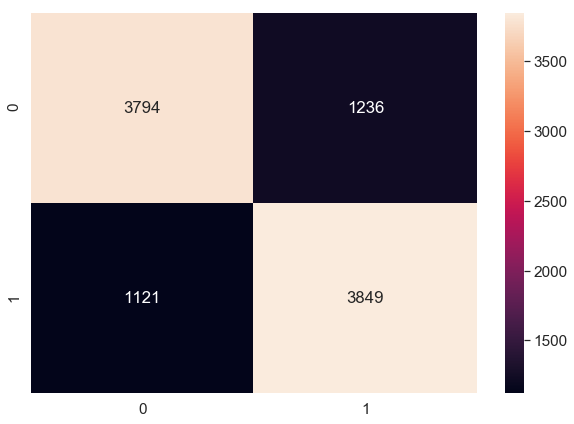

In [76]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [77]:
# Formatting Final Results
final_results = pd.concat([y_test, test_identity], axis = 1).dropna()
final_results['predicted_reach'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)

In [78]:
# Final Results after modelling
final_results

,user,enrolled,predicted_reach
0,38645,1,0
1,112423,1,1
2,42242,1,1
3,66099,1,1
4,292452,0,0
5,246282,0,0
6,233803,0,0
7,53750,0,0
8,286077,1,1
9,276305,1,1
